# Labelme转mask-单张图像

同济子豪兄 2023-6-6

## 导入工具包

In [13]:
import os
import json
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## 载入图像

In [49]:
img_path = 'uk1.jpeg'

In [50]:
img_bgr = cv2.imread(img_path)

In [51]:
img_bgr.shape

(1500, 2250, 3)

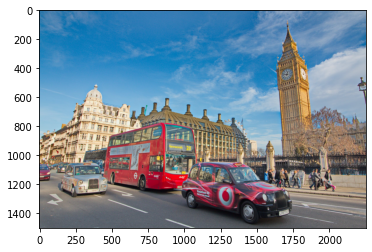

In [52]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 创建空白图像

0-背景

In [53]:
img_mask = np.zeros(img_bgr.shape[:2])

In [54]:
img_mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

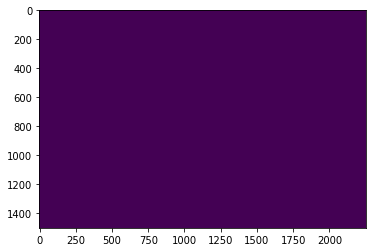

In [55]:
plt.imshow(img_mask)
plt.show()

## 载入该图像labelme格式的json标注文件

In [59]:
labelme_json_path = 'uk1.json'

In [60]:
with open(labelme_json_path, 'r', encoding='utf-8') as f:
    labelme = json.load(f)

In [61]:
labelme.keys()

dict_keys(['version', 'flags', 'shapes', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])

## 元数据

In [62]:
labelme['version']

'5.3.0a0'

In [63]:
# 图像文件名
labelme['imagePath']

'uk1.jpeg'

In [64]:
# 图像高度
labelme['imageHeight']

1500

In [65]:
# 图像宽度
labelme['imageWidth']

2250

## 该图中的所有标注信息

In [66]:
# labelme['shapes']

In [67]:
for each in labelme['shapes']:
    print(each['label'], each['shape_type'])

car polygon
car polygon
bus polygon
car polygon
car polygon
bus polygon
building polygon
building polygon
tower polygon
sky polygon
tree polygon
person polygon
person polygon
person polygon
person polygon
person polygon
person polygon
road polygon
lane line
lane line
lane line
lane line
lane line
lane line
lane line
sign linestrip
sign linestrip
sign linestrip
building polygon
clock circle
clock circle
fence polygon
fence polygon
fence polygon
fence polygon
wall polygon


## 每个类别的信息及画mask的顺序（按照由大到小，由粗到精的顺序）

In [68]:
# 0-背景，从 1 开始
class_info = [
    {'label':'sky', 'type':'polygon', 'color':1},                    # polygon 多段线
    {'label':'road', 'type':'polygon', 'color':2},
    {'label':'building', 'type':'polygon', 'color':3},
    {'label':'tower','type':'polygon','color':4},
    {'label':'bus','type':'polygon','color':5},
    {'label':'car','type':'polygon','color':6},
    {'label':'tree','type':'polygon','color':7},
    {'label':'fence','type':'polygon','color':8},
    {'label':'wall','type':'polygon','color':9},
    {'label':'person','type':'polygon','color':10},
    {'label':'clock', 'type':'circle', 'color':11, 'thickness':-1},   # circle 圆形，-1表示填充
    {'label':'lane', 'type':'line', 'color':12, 'thickness':5},       # line 两点线段，填充线宽
    {'label':'sign', 'type':'linestrip', 'color':13, 'thickness':3}   # linestrip 多段线，填充线宽
]

## 按顺序将mask绘制在空白图上

In [69]:
for one_class in class_info: # 按顺序遍历每一个类别
    for each in labelme['shapes']: # 遍历所有标注，找到属于当前类别的标注
        if each['label'] == one_class['label']:
            if one_class['type'] == 'polygon': # polygon 多段线标注
                
                # 获取点的坐标
                points = [np.array(each['points'], dtype=np.int32).reshape((-1, 1, 2))]
                
                # 在空白图上画 mask（闭合区域）
                img_mask = cv2.fillPoly(img_mask, points, color=one_class['color'])
                
            elif one_class['type'] == 'line' or one_class['type'] == 'linestrip': # line 或者 linestrip 线段标注
                
                # 获取点的坐标
                points = [np.array(each['points'], dtype=np.int32).reshape((-1, 1, 2))]
                
                # 在空白图上画 mask（非闭合区域）
                img_mask = cv2.polylines(img_mask, points, isClosed=False, color=one_class['color'], thickness=one_class['thickness']) 
            
            elif one_class['type'] == 'circle': # circle 圆形标注
                
                points = np.array(each['points'], dtype=np.int32)
                
                center_x, center_y = points[0][0], points[0][1] # 圆心点坐标
                
                edge_x, edge_y = points[1][0], points[1][1]     # 圆周点坐标
                
                radius = np.linalg.norm(np.array([center_x, center_y] - np.array([edge_x, edge_y]))).astype('uint32') # 半径
                
                img_mask = cv2.circle(img_mask, (center_x, center_y), radius, one_class['color'], one_class['thickness'])
            
            else:
                print('未知标注类型', one_class['type'])

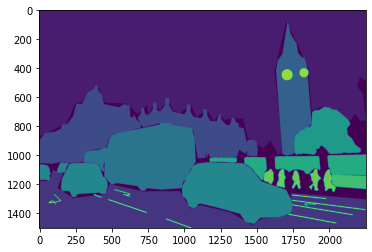

In [70]:
plt.imshow(img_mask)
plt.show()

## 保存mask标注图像（必须是png格式）

In [71]:
img_mask.shape

(1500, 2250)

In [72]:
mask_path = img_path.split('.')[0] + '.png'

In [73]:
cv2.imwrite(mask_path, img_mask)

True

## 载入mask标注图像

In [74]:
mask_img = cv2.imread('uk1.png')

In [75]:
mask_img.shape

(1500, 2250, 3)

In [81]:
np.unique(mask_img)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=uint8)

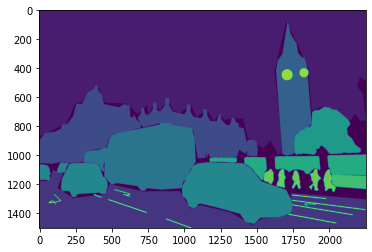

In [77]:
plt.imshow(mask_img[:,:,0])
plt.show()